In [1]:
# Basic Vocab
# Observations/Instances/Samples/Examples
# Target Variable
# Supervised vs Unsupervised

In [64]:
# Here, we import required libraries and our raw training data.

# Numerical analysis
import numpy as np

# Data manipulation
import pandas as pd
import string

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Import training data. "df" is short here for "data frame" (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).
df = pd.read_csv('societal_bias_data.tsv', sep='\t')

In [65]:
# Run this to see basic metadata describing the structure of our raw training data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        554 non-null    int64 
 1   sentence  554 non-null    object
 2   label     554 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.1+ KB


In [63]:
# Run this for some basic statistics on our raw training data.
df.describe()

,id,label
count,554.000000,554.000000
mean,277.500000,0.462094
std,160.070297,0.499012
min,1.000000,0.000000
25%,139.250000,0.000000
50%,277.500000,0.000000
75%,415.750000,1.000000
max,554.000000,1.000000


<Axes: ylabel='Frequency'>

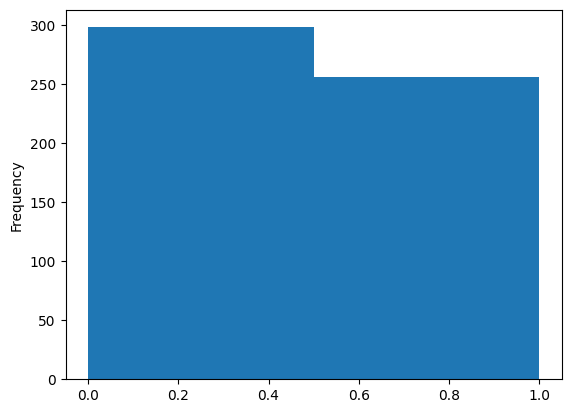

In [66]:
# Plot the histogram of the class column
df['label'].plot(bins=2,kind = 'hist')

In [67]:
negative = df[df['label']==0]
positive = df[df['label']==1]

# Uncomment these (ideally one at a time) to inspect the data.
# negative
# positive

,id,sentence,label
0,1,Gender diversity in parenting styles enriches ...,0
1,2,Each individual has the capacity to challenge ...,0
3,4,Both men and women can contribute to building ...,0
4,5,Gender is just one aspect of a person's identity.,0
5,6,Both men and women can be leaders in their com...,0
...,...,...,...
548,549,Both men and women can be advocates for gender...,0
550,551,Gender diversity in artistic expression reflec...,0
551,552,Each person's autonomy and agency should be re...,0
552,553,Both men and women possess a wide range of ski...,0


In [68]:
sentences = df['sentence'].tolist()


In [69]:
combined = " ".join(sentences)

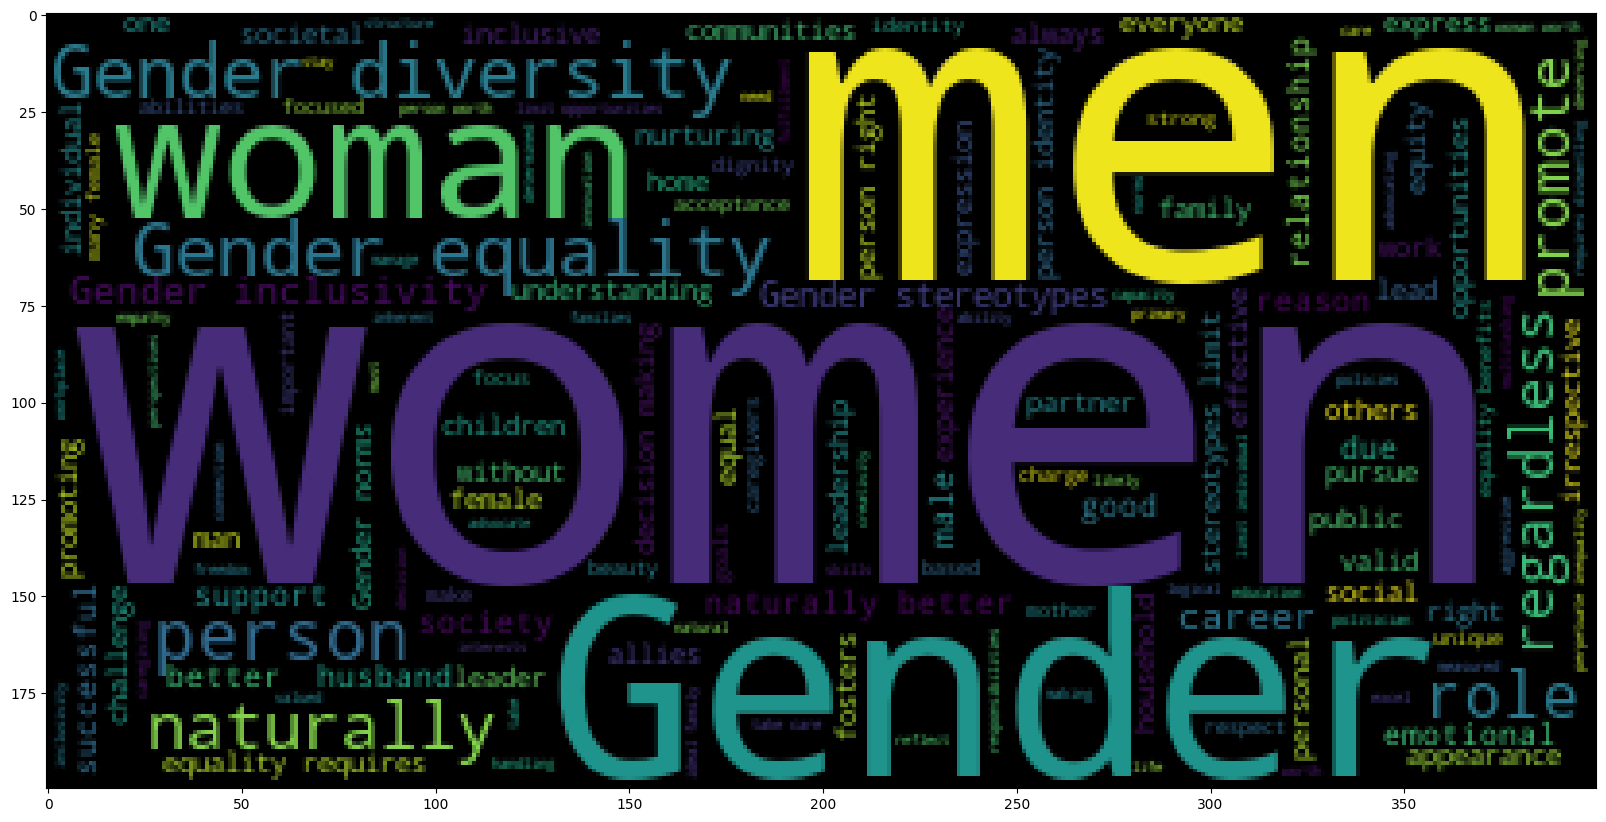

In [70]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(combined))
# Show cloud for gendered and non-gendered separation.

In [71]:
# Natural language toolkit
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Tuning a model via pre-processing steps in a pipeline.
#
# It is important to keep a CLEAN dataset.
# Here, we can use our common sense to realize that the "ID" column in our data and punctuation are not relevant in predicting whether a statement has gender bias or not.
# Removing extraneous data will strengthen the predictive capability of a model. Let's think about this in a more practical example:
# When we determine what color a cup is, does the time of day matter? Or the volume on the TV in the background? We want to only focus on the cup and lighting.

# Drop unnecessary column.
df = df.drop(['id'], axis=1)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentence,label
0,Gender diversity in parenting styles enriches ...,0
1,Each individual has the capacity to challenge ...,0
2,The reason women can't have children after 35 ...,1
3,Both men and women can contribute to building ...,0
4,Gender is just one aspect of a person's identity.,0
...,...,...
549,Women are naturally better at organizing event...,1
550,Gender diversity in artistic expression reflec...,0
551,Each person's autonomy and agency should be re...,0
552,Both men and women possess a wide range of ski...,0


In [11]:
# What else can we do? Drop punctuation.

# Give examples then show definition of main pipeline. Programming details are not as important to teach here.
# Basic, basic explanation of what a function is/does.
def removePunctuation(msg):
    msgSansPunctuation = [char for char in msg if char not in string.punctuation]
    result = ''.join(msgSansPunctuation)
    return result



In [75]:
# Then do the actual code.
def removeStopWords(msg, stopwordsList):
    return [word for word in msg.split() if word.lower() not in stopwordsList]

# Explore the stopwords. Notice that some gendered terms are being removed, which we very much care about. What do you think should/shouldn't be a stopword?
# *** Try processing the data with base stop words and a smaller subset. Do we get different results? 
new_stopwords = set(stopwords.words('english')) - {'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself'}

In [76]:
# Define pipeline
def pipeline(msg):
    noPunct = removePunctuation(msg)
    result = removeStopWords(noPunct, stopwords.words('english'))
    return result

df_clean = df['sentence'].apply(pipeline)

In [77]:
print(df_clean[5])
print(df['sentence'][5])

['men', 'women', 'leaders', 'communities']
Both men and women can be leaders in their communities.


In [78]:
# Tokenization (Count Vectoring)
from sklearn.feature_extraction.text import CountVectorizer

# Basic explanation of what it is, maybe an easy example.
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# min/max_df
# dtype: type of the matrix returned; really only needs to be large if an example has potential to have a VERY high count of a feature (word).
vectorizer = CountVectorizer(analyzer = pipeline, dtype = np.uint8)
# wtf does this do
input_countVectorizer = vectorizer.fit_transform(df['sentence'])
# words



In [79]:
X = pd.DataFrame(input_countVectorizer.toarray())

In [80]:
Y = df['label']

In [18]:
# Prior probability (total in dataset)
# Defined as # of sa in class / total number of examples
# Likelihood (proximity feature-wise to classified data points) (K-NNish? I think it's more about a defined range of proximity than the # of neighbors as far as constraints go.)
# Defined as # in vicinity / total in class
# Bayes' Theorem combines both: Posterior Prob = Prior Prob * Likelihood. Higher prob = decision.
# P(Outcome | Sample Features)  = P(Outcome) * P(Sample Features | Outcome) / P(Sample Features)

In [81]:
from sklearn.model_selection import train_test_split
# 40% testing, 60% training
# NOTE: Likely due to container resource restraints, test_size at a sufficiently small value will cause the kernel to crash.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1)


In [82]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, Y_train)

MultinomialNB()

In [83]:
# Confusion Matrix
#              TRUE CLASS
# P            +                -
# R   +     TRUE +           FALSE + (Type 1 error)
# E   -     FALSE - type 2   TRUE -
# D

In [84]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

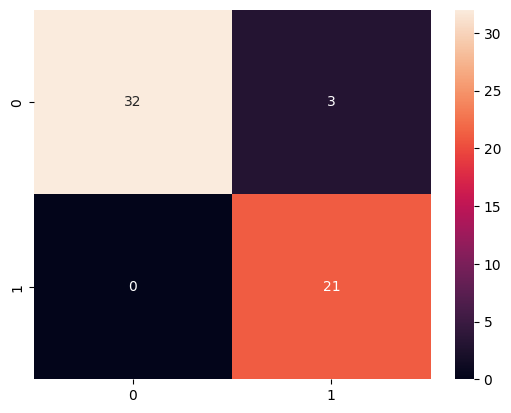

In [85]:
Y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_predict_test)
sns.heatmap(cm, annot=True)

In [86]:
print(classification_report(Y_test, Y_predict_test))
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support
# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label a negative sample as positive.
# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
# The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
# The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important. Beta defaults to 1.0 here.
# Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.

              precision    recall  f1-score   support

           0       1.00      0.91      0.96        35
           1       0.88      1.00      0.93        21

    accuracy                           0.95        56
   macro avg       0.94      0.96      0.94        56
weighted avg       0.95      0.95      0.95        56



In [113]:
# Vectorizer should still apply from above:
vectorizer = CountVectorizer(analyzer = pipeline, dtype = np.uint8)

# Write test sentences.
unclassified_data = [['Women should stay in the kitchen instead of working.', 1],
                     ['Women should be free to explore the careers they want to.', 0]]
# Create the pandas DataFrame and vectorize data.
temp_unclassified_df = pd.DataFrame(unclassified_data, columns=['sentence', 'label'])
unclassified_df = pd.concat([df, temp_unclassified_df])
unclassified_input_countVectorizer = vectorizer.fit_transform(unclassified_df['sentence'])
unclassified_X = pd.DataFrame(unclassified_input_countVectorizer.toarray())
unclassified_X
# Make prediction.
# predict_classified_Y = NB_classifier.predict(unclassified_X)


,0,1,2,3,4,5,6,7,8,9,...,870,871,872,873,874,875,876,877,878,879
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
553,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
554,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
